In [22]:
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


# EDA FOR BENIN

In [17]:
df_benin = pd.read_csv(r"c:\Users\Naim\solar_radition\data\benin-malanville.csv")

In [18]:
print("Benin Data:")
print(df_benin.head())

Benin Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [19]:
# Summary statistics for Benin data
print("Benin Data Summary:")
print(df_benin.describe())

Benin Data Summary:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

 Data Quality Check

In [20]:
print(df_benin.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [30]:
# Check for missing values in key columns
missing_values = df_benin[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].isnull().sum()

# Display missing values
print("Missing values in key columns:")
print(missing_values)

# Check for negative values in GHI, DNI, DHI, ModA, ModB, WS, WSgust
negative_values = df_benin[(df_benin['GHI'] < 0) | (df_benin['DNI'] < 0) | (df_benin['DHI'] < 0) |
                     (df_benin['ModA'] < 0) | (df_benin['ModB'] < 0) | 
                     (df_benin['WS'] < 0) | (df_benin['WSgust'] < 0)]

print("Negative Values:\n", negative_values)

Missing values in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Negative Values:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  2

Visualize the Distribution of GHI, DNI, and DHI

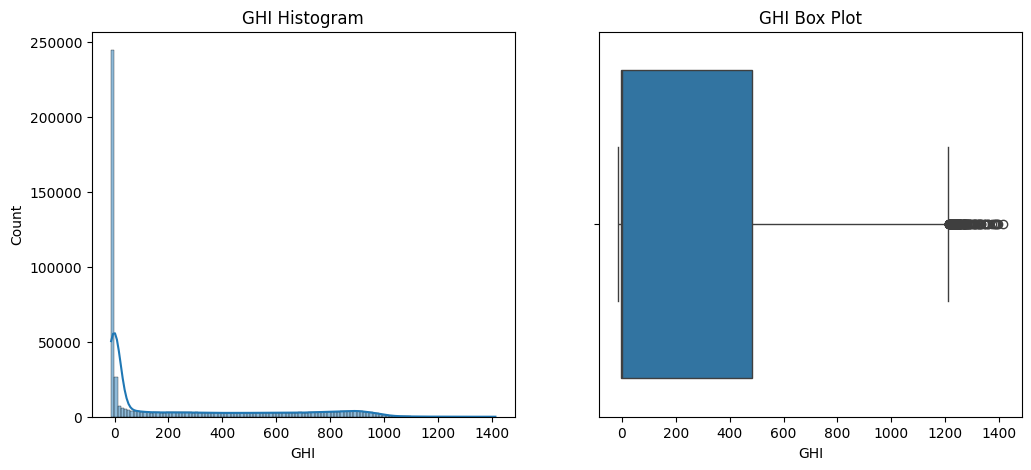

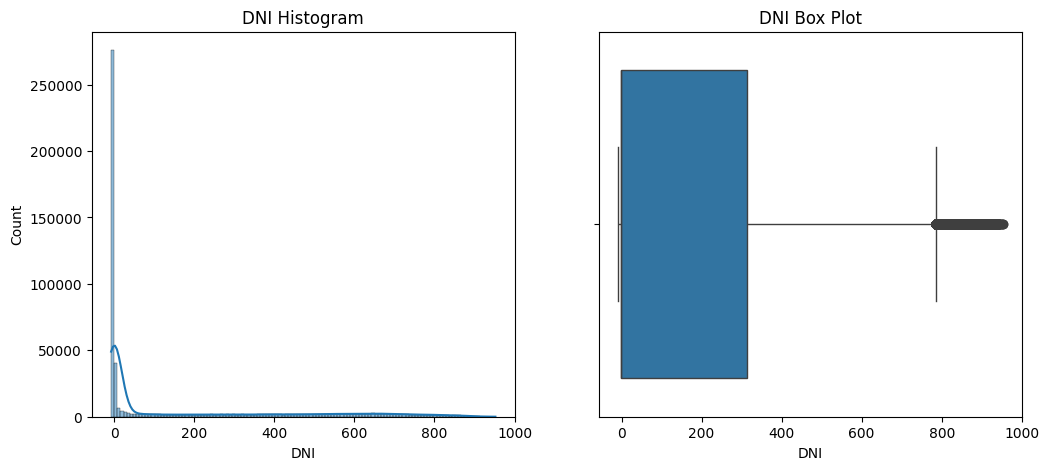

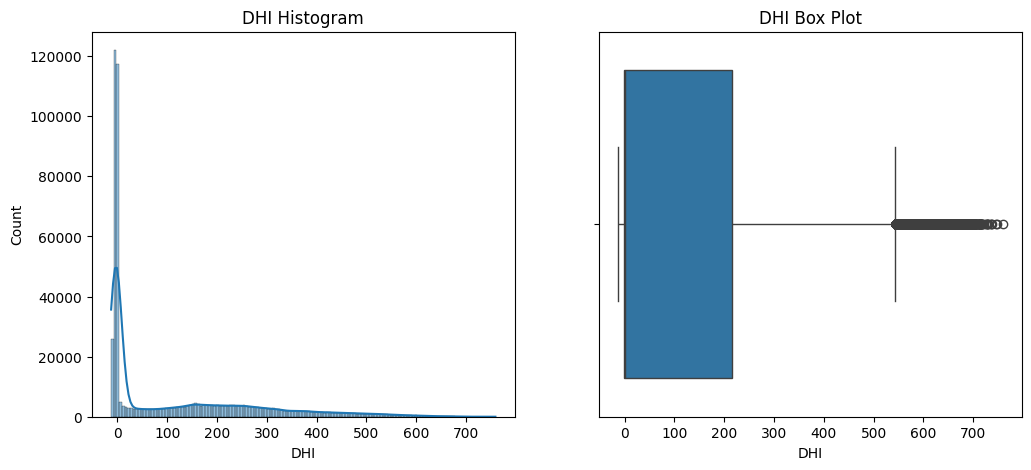

Outliers:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673     2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525141  2022-08-08 16:22     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525142  2022-08-08 16:23     4.6    0.2    4.6     5.9     5.8  21.9  99.0   
525143  2022-08-08 16:24     4.5   -0.1    4.5     5.8     5.7  21.9  99.0   
525151  2022-08-08 16:32     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525155  2022-08-08 16:36     4.8    0.0    4.9     6.0     5.9  22.0  99.1   

         WS  WSgust  ...  TModA  TModB  Comments  GH

In [28]:
from scipy.stats import zscore # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
columns_to_analyze = ['GHI', 'DNI', 'DHI']

# Plot histograms and box plots
for column in columns_to_analyze:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_benin[column], kde=True)
    plt.title(f'{column} Histogram')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_benin[column])
    plt.title(f'{column} Box Plot')

    plt.show()

# Calculate Z-scores for the columns of interest
df_benin['GHI_zscore'] = zscore(df_benin['GHI'])
df_benin['DNI_zscore'] = zscore(df_benin['DNI'])
df_benin['DHI_zscore'] = zscore(df_benin['DHI'])
df_benin['ModA_zscore'] = zscore(df_benin['ModA'])
df_benin['ModB_zscore'] = zscore(df_benin['ModB'])
df_benin['WS_zscore'] = zscore(df_benin['WS'])
df_benin['WSgust_zscore'] = zscore(df_benin['WSgust'])

# Identify outliers (Z-score greater than 3 or less than -3)
outliers = df_benin[(df_benin['GHI_zscore'].abs() > 3) | (df_benin['DNI_zscore'].abs() > 3) |
              (df_benin['DHI_zscore'].abs() > 3) | (df_benin['ModA_zscore'].abs() > 3) |
              (df_benin['ModB_zscore'].abs() > 3) | (df_benin['WS_zscore'].abs() > 3) |
              (df_benin['WSgust_zscore'].abs() > 3)]

print("Outliers:\n", outliers)


Time Series Analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot GHI, DNI, DHI, and Tamb over time
plt.plot(df_benin['Timestamp'], df_benin['GHI'], label='GHI (Global Horizontal Irradiance)', color='blue', alpha=0.7)
plt.plot(df_benin['Timestamp'], df_benin['DNI'], label='DNI (Direct Normal Irradiance)', color='orange', alpha=0.7)
plt.plot(df_benin['Timestamp'], df_benin['DHI'], label='DHI (Diffuse Horizontal Irradiance)', color='green', alpha=0.7)
plt.plot(df_benin['Timestamp'], df_benin['Tamb'], label='Tamb (Ambient Temperature)', color='red', alpha=0.7)

# Add titles and labels
plt.title('Time Series of Solar Irradiance and Ambient Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Values (W/m² or °C)')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Plot ModA and ModB over time with cleaning events highlighted
plt.figure(figsize=(14, 8))

# Plot ModA and ModB
plt.plot(df_benin['Timestamp'], df_benin['ModA'], label='ModA Sensor', color='blue', alpha=0.7)
plt.plot(df_benin['Timestamp'], df_benin['ModB'], label='ModB Sensor', color='orange', alpha=0.7)

# Highlight the cleaning events
cleaning_events = df_benin[df_benin['Cleaning'] == 1]
plt.scatter(cleaning_events['Timestamp'], cleaning_events['ModA'], color='blue', marker='o', s=50, label='Cleaning Event on ModA', edgecolor='black')
plt.scatter(cleaning_events['Timestamp'], cleaning_events['ModB'], color='orange', marker='o', s=50, label='Cleaning Event on ModB', edgecolor='black')

# Add titles and labels
plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB)')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings (W/m²)')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Convert Timestamp to datetime if not already done
df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])

# Extract month and hour from Timestamp
df_benin['Month'] = df_benin['Timestamp'].dt.month
df_benin['Hour'] = df_benin['Timestamp'].dt.hour

# Group by month and calculate mean
monthly_avg = df_benin.groupby('Month').mean()[['GHI', 'DNI', 'DHI', 'Tamb']]

# Plot monthly averages
plt.figure(figsize=(12, 6))
monthly_avg.plot(marker='o')
plt.title('Monthly Averages of Solar Irradiance and Ambient Temperature')
plt.xlabel('Month')
plt.ylabel('Average Values (W/m² or °C)')
plt.grid(True)
plt.show()


In [ ]:
# Group by hour and calculate mean
hourly_avg = df_benin.groupby('Hour').mean()[['GHI', 'DNI', 'DHI', 'Tamb']]

# Plot hourly trends
plt.figure(figsize=(12, 6))
hourly_avg.plot(marker='o')
plt.title('Hourly Trends of Solar Irradiance and Ambient Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Values (W/m² or °C)')
plt.grid(True)
plt.show()
